## Flight Price Analysis - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the Bangladesh Flight Price Dataset.

### Dataset Overview
- **Source**: Kaggle - Flight Price Dataset of Bangladesh
- **Purpose**: Understand data structure, distributions, and patterns before pipeline processing

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset
csv_path = 'dataset/Flight_Price_Dataset_of_Bangladesh.csv'
df = pd.read_csv(csv_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 57,000 rows × 17 columns


## 2. Basic Data Information

In [3]:
# First few rows
print("=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
df.head()

FIRST 5 ROWS


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.22,Direct,Airbus A320,Economy,Online Website,21131.23,5169.68,26300.91,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.61,Direct,Airbus A320,First Class,Travel Agency,11605.40,200.00,11805.40,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.69,1 Stop,Boeing 787,Economy,Travel Agency,39882.50,11982.37,51864.87,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.69,Direct,Airbus A320,Economy,Direct Booking,4435.61,200.00,4635.61,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.06,1 Stop,Airbus A350,Business,Direct Booking,59243.81,14886.57,74130.38,Regular,90


In [4]:
# Column names and data types
print("=" * 80)
print("COLUMN INFORMATION")
print("=" * 80)
print(f"\nTotal Columns: {len(df.columns)}\n")

for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2}. {col:<30} → {dtype}")

COLUMN INFORMATION

Total Columns: 17

 1. Airline                        → object
 2. Source                         → object
 3. Source Name                    → object
 4. Destination                    → object
 5. Destination Name               → object
 6. Departure Date & Time          → object
 7. Arrival Date & Time            → object
 8. Duration (hrs)                 → float64
 9. Stopovers                      → object
10. Aircraft Type                  → object
11. Class                          → object
12. Booking Source                 → object
13. Base Fare (BDT)                → float64
14. Tax & Surcharge (BDT)          → float64
15. Total Fare (BDT)               → float64
16. Seasonality                    → object
17. Days Before Departure          → int64


In [5]:
# Detailed info
print("=" * 80)
print("DATAFRAME INFO")
print("=" * 80)
df.info()

DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  

In [6]:
# Memory usage
memory_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"\nTotal Memory Usage: {memory_mb:.2f} MB")


Total Memory Usage: 43.00 MB


## 3. Missing Values Analysis

In [7]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values
}).sort_values('Missing Count', ascending=False)

print(f"\nTotal Missing Values: {missing.sum():,}")
print(f"Columns with Missing Values: {(missing > 0).sum()}")
print("\n")
missing_df[missing_df['Missing Count'] > 0]

MISSING VALUES ANALYSIS

Total Missing Values: 0
Columns with Missing Values: 0




,Column,Missing Count,Missing %


In [18]:
# Visualize missing values
if missing.sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_cols = missing[missing > 0]
    missing_cols.plot(kind='bar', ax=ax, color='coral')
    ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    ax.set_xlabel('Column')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found in the dataset!")

 No missing values found in the dataset!


## 4. Statistical Summary

In [9]:
# Numerical columns statistics
print("=" * 80)
print("NUMERICAL COLUMNS - DESCRIPTIVE STATISTICS")
print("=" * 80)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical Columns: {numerical_cols}\n")

df[numerical_cols].describe().T

NUMERICAL COLUMNS - DESCRIPTIVE STATISTICS

Numerical Columns: ['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)', 'Days Before Departure']



,count,mean,std,min,25%,50%,75%,max
Duration (hrs),57000.00,3.99,4.09,0.50,1.00,2.64,5.49,15.83
Base Fare (BDT),57000.00,58899.56,68840.61,1600.98,8856.32,31616.00,85722.93,449222.93
Tax & Surcharge (BDT),57000.00,11448.24,12124.34,200.00,200.00,9450.94,17513.05,73383.44
Total Fare (BDT),57000.00,71030.32,81769.20,1800.98,9602.70,41307.54,103800.91,558987.33
Days Before Departure,57000.00,45.46,26.02,1.00,23.00,45.00,68.00,90.00


In [10]:
# Categorical columns statistics
print("=" * 80)
print("CATEGORICAL COLUMNS - UNIQUE VALUES")
print("=" * 80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Columns: {len(categorical_cols)}\n")

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count:,} unique values")

CATEGORICAL COLUMNS - UNIQUE VALUES

Categorical Columns: 12

Airline: 24 unique values
Source: 8 unique values
Source Name: 8 unique values
Destination: 20 unique values
Destination Name: 20 unique values
Departure Date & Time: 54,126 unique values
Arrival Date & Time: 56,944 unique values
Stopovers: 3 unique values
Aircraft Type: 5 unique values
Class: 3 unique values
Booking Source: 3 unique values
Seasonality: 4 unique values


## 5. Airline Analysis

In [11]:
# Airlines distribution
print("=" * 80)
print("AIRLINE DISTRIBUTION")
print("=" * 80)

airline_counts = df['Airline'].value_counts()
airline_pct = (airline_counts / len(df) * 100).round(2)

airline_df = pd.DataFrame({
    'Airline': airline_counts.index,
    'Bookings': airline_counts.values,
    'Percentage': airline_pct.values
})

print(f"\nTotal Airlines: {df['Airline'].nunique()}\n")
airline_df

AIRLINE DISTRIBUTION

Total Airlines: 24



,Airline,Bookings,Percentage
0,US-Bangla Airlines,4496,7.89
1,Lufthansa,2368,4.15
2,Vistara,2368,4.15
3,FlyDubai,2346,4.12
4,Biman Bangladesh Airlines,2344,4.11
5,Emirates,2327,4.08
6,Saudia,2321,4.07
7,Thai Airways,2316,4.06
8,AirAsia,2312,4.06
9,Air Astra,2304,4.04


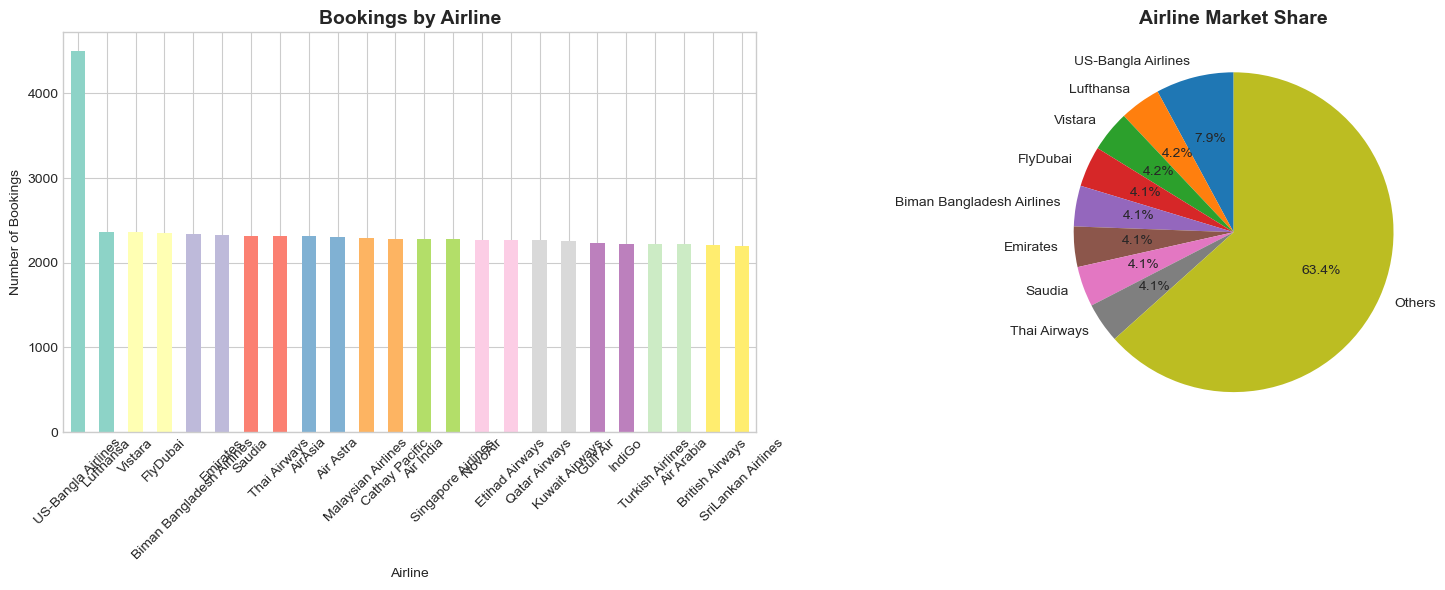

In [12]:
# Visualize airline distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = plt.cm.Set3(np.linspace(0, 1, len(airline_counts)))
airline_counts.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Bookings by Airline', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Number of Bookings')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
top_n = 8
top_airlines = airline_counts.head(top_n)
others = airline_counts[top_n:].sum()
if others > 0:
    pie_data = pd.concat([top_airlines, pd.Series({'Others': others})])
else:
    pie_data = top_airlines

axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Airline Market Share', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Route Analysis

In [13]:
# Top source airports
print("=" * 80)
print("TOP 10 SOURCE AIRPORTS")
print("=" * 80)

source_counts = df.groupby(['Source', 'Source Name']).size().reset_index(name='Count')
source_counts = source_counts.sort_values('Count', ascending=False).head(10)
source_counts

TOP 10 SOURCE AIRPORTS


,Source,Source Name,Count
1,CGP,"Shah Amanat International Airport, Chittagong",7241
7,ZYL,"Osmani International Airport, Sylhet",7179
4,JSR,Jessore Airport,7149
3,DAC,"Hazrat Shahjalal International Airport, Dhaka",7146
0,BZL,Barisal Airport,7102
5,RJH,"Shah Makhdum Airport, Rajshahi",7091
2,CXB,Cox's Bazar Airport,7049
6,SPD,Saidpur Airport,7043


In [14]:
# Top destination airports
print("=" * 80)
print("TOP 10 DESTINATION AIRPORTS")
print("=" * 80)

dest_counts = df.groupby(['Destination', 'Destination Name']).size().reset_index(name='Count')
dest_counts = dest_counts.sort_values('Count', ascending=False).head(10)
dest_counts

TOP 10 DESTINATION AIRPORTS


,Destination,Destination Name,Count
10,JED,"King Abdulaziz International Airport, Jeddah",3071
6,DEL,"Indira Gandhi International Airport, Delhi",3069
11,JFK,"John F. Kennedy International Airport, New York",3066
16,SIN,Singapore Changi Airport,3063
0,BKK,"Suvarnabhumi Airport, Bangkok",3036
8,DXB,Dubai International Airport,3005
13,KUL,Kuala Lumpur International Airport,2968
14,LHR,London Heathrow Airport,2968
9,IST,Istanbul Airport,2940
2,CCU,Netaji Subhas Chandra Bose International Airpo...,2938


TOP 15 MOST POPULAR ROUTES


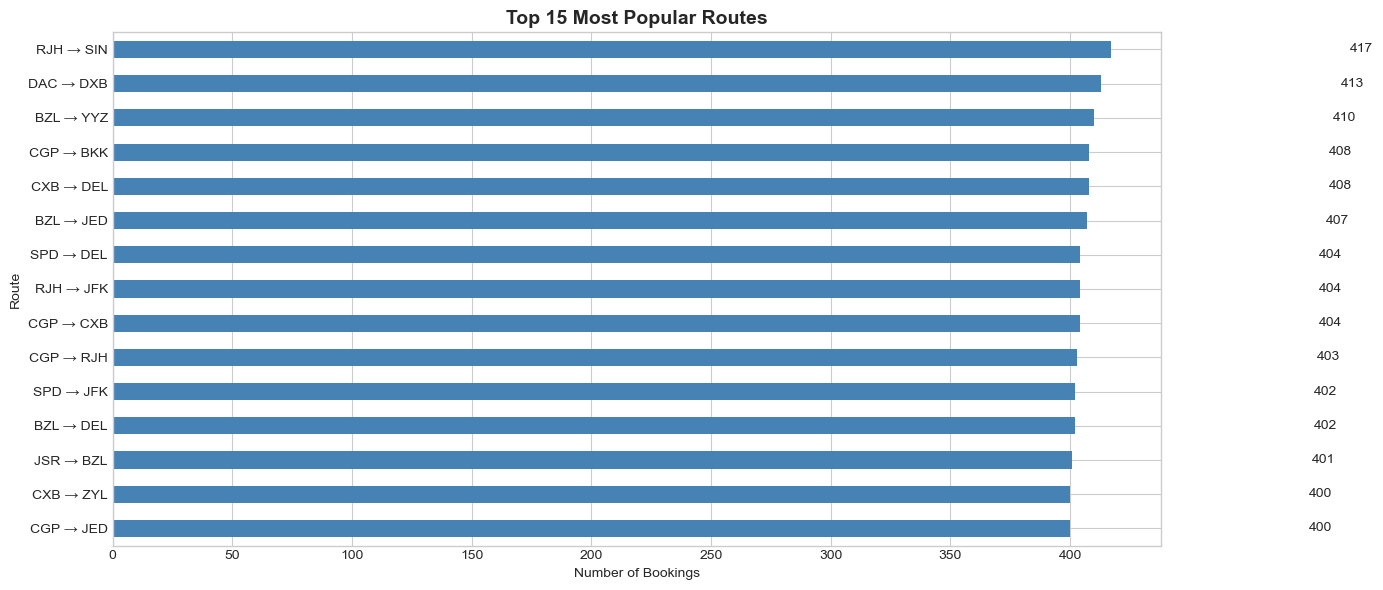

In [15]:
# Top routes
print("=" * 80)
print("TOP 15 MOST POPULAR ROUTES")
print("=" * 80)

df['Route'] = df['Source'] + ' → ' + df['Destination']
route_counts = df['Route'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(14, 6))
route_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Top 15 Most Popular Routes', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Bookings')
ax.set_ylabel('Route')
ax.invert_yaxis()

# Add value labels
for i, v in enumerate(route_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

## 7. Fare Analysis

In [17]:
# Fare statistics
print("=" * 80)
print("FARE STATISTICS (in BDT)")
print("=" * 80)

fare_cols = ['Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)']

for col in fare_cols:
    print(f"\n{col}:")
    print(f"  Mean:   {df[col].mean():,.2f}")
    print(f"  Median: {df[col].median():,.2f}")
    print(f"  Min:    {df[col].min():,.2f}")
    print(f"  Max:    {df[col].max():,.2f}")
    print(f"  Std:    {df[col].std():,.2f}")

FARE STATISTICS (in BDT)

Base Fare (BDT):
  Mean:   58,899.56
  Median: 31,616.00
  Min:    1,600.98
  Max:    449,222.93
  Std:    68,840.61

Tax & Surcharge (BDT):
  Mean:   11,448.24
  Median: 9,450.94
  Min:    200.00
  Max:    73,383.44
  Std:    12,124.34

Total Fare (BDT):
  Mean:   71,030.32
  Median: 41,307.54
  Min:    1,800.98
  Max:    558,987.33
  Std:    81,769.20


In [ ]:
# Fare distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(fare_cols):
    axes[i].hist(df[col], bins=50, color=['#3498db', '#2ecc71', '#e74c3c'][i], 
                 edgecolor='white', alpha=0.8)
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Amount (BDT)')
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: ৳{df[col].mean():,.0f}')
    axes[i].axvline(df[col].median(), color='orange', linestyle='--', label=f'Median: ৳{df[col].median():,.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Average fare by airline
print("=" * 80)
print("AVERAGE TOTAL FARE BY AIRLINE")
print("=" * 80)

avg_fare_airline = df.groupby('Airline')['Total Fare (BDT)'].agg(['mean', 'median', 'count'])
avg_fare_airline.columns = ['Avg Fare', 'Median Fare', 'Bookings']
avg_fare_airline = avg_fare_airline.sort_values('Avg Fare', ascending=False)
avg_fare_airline

In [ ]:
# Visualize average fare by airline
fig, ax = plt.subplots(figsize=(14, 6))

avg_fare_airline['Avg Fare'].plot(kind='bar', ax=ax, color='teal', alpha=0.8)
ax.set_title('Average Total Fare by Airline', fontsize=14, fontweight='bold')
ax.set_xlabel('Airline')
ax.set_ylabel('Average Fare (BDT)')
ax.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(avg_fare_airline['Avg Fare']):
    ax.text(i, v + 500, f'৳{v:,.0f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

## 8. Booking Class Analysis

In [ ]:
# Booking class distribution
print("=" * 80)
print("BOOKING CLASS DISTRIBUTION")
print("=" * 80)

class_counts = df['Class'].value_counts()
class_pct = (class_counts / len(df) * 100).round(2)

class_df = pd.DataFrame({
    'Class': class_counts.index,
    'Bookings': class_counts.values,
    'Percentage': class_pct.values
})
class_df

In [ ]:
# Fare by class
print("=" * 80)
print("AVERAGE FARE BY BOOKING CLASS")
print("=" * 80)

fare_by_class = df.groupby('Class')['Total Fare (BDT)'].agg(['mean', 'median', 'min', 'max'])
fare_by_class.columns = ['Avg Fare', 'Median Fare', 'Min Fare', 'Max Fare']
fare_by_class = fare_by_class.sort_values('Avg Fare', ascending=False)
fare_by_class

In [ ]:
# Visualize fare by class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart for class distribution
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.02] * len(class_counts))
axes[0].set_title('Booking Class Distribution', fontsize=14, fontweight='bold')

# Box plot for fare by class
df.boxplot(column='Total Fare (BDT)', by='Class', ax=axes[1])
axes[1].set_title('Fare Distribution by Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Total Fare (BDT)')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

## 9. Seasonality Analysis

In [ ]:
# Seasonality distribution
print("=" * 80)
print("SEASONALITY DISTRIBUTION")
print("=" * 80)

season_counts = df['Seasonality'].value_counts()
season_pct = (season_counts / len(df) * 100).round(2)

season_df = pd.DataFrame({
    'Season': season_counts.index,
    'Bookings': season_counts.values,
    'Percentage': season_pct.values
})
season_df

In [ ]:
# Fare by seasonality
print("=" * 80)
print("AVERAGE FARE BY SEASONALITY")
print("=" * 80)

# Define peak seasons
peak_seasons = ['Eid ul-Fitr', 'Eid ul-Adha', 'Winter Holidays']
df['Is Peak Season'] = df['Seasonality'].isin(peak_seasons)

fare_by_season = df.groupby('Seasonality')['Total Fare (BDT)'].agg(['mean', 'median', 'count'])
fare_by_season.columns = ['Avg Fare', 'Median Fare', 'Bookings']
fare_by_season = fare_by_season.sort_values('Avg Fare', ascending=False)
fare_by_season

In [ ]:
# Peak vs Non-Peak comparison
print("=" * 80)
print("PEAK VS NON-PEAK SEASON COMPARISON")
print("=" * 80)

peak_comparison = df.groupby('Is Peak Season')['Total Fare (BDT)'].agg(['mean', 'median', 'count'])
peak_comparison.index = ['Non-Peak', 'Peak']
peak_comparison.columns = ['Avg Fare', 'Median Fare', 'Bookings']

print("\n")
print(peak_comparison)
print("\n")

# Calculate difference
peak_avg = peak_comparison.loc['Peak', 'Avg Fare']
non_peak_avg = peak_comparison.loc['Non-Peak', 'Avg Fare']
diff_pct = ((peak_avg - non_peak_avg) / non_peak_avg * 100)

print(f"Peak Season Average Fare: ৳{peak_avg:,.2f}")
print(f"Non-Peak Average Fare:    ৳{non_peak_avg:,.2f}")
print(f"Difference:               ৳{peak_avg - non_peak_avg:,.2f} ({diff_pct:+.1f}%)")

In [ ]:
# Visualize seasonality
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for average fare by season
colors = ['#e74c3c' if s in peak_seasons else '#3498db' for s in fare_by_season.index]
fare_by_season['Avg Fare'].plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Average Fare by Seasonality', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Fare (BDT)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(df['Total Fare (BDT)'].mean(), color='green', linestyle='--', 
                label=f'Overall Mean: ৳{df["Total Fare (BDT)"].mean():,.0f}')
axes[0].legend()

# Box plot for peak vs non-peak
df.boxplot(column='Total Fare (BDT)', by='Is Peak Season', ax=axes[1])
axes[1].set_xticklabels(['Non-Peak', 'Peak'])
axes[1].set_title('Fare Distribution: Peak vs Non-Peak', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Season Type')
axes[1].set_ylabel('Total Fare (BDT)')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 10. Duration and Stopovers Analysis

In [ ]:
# Duration statistics
print("=" * 80)
print("FLIGHT DURATION STATISTICS")
print("=" * 80)

print(f"\nDuration (hours):")
print(f"  Mean:   {df['Duration (hrs)'].mean():.2f} hrs")
print(f"  Median: {df['Duration (hrs)'].median():.2f} hrs")
print(f"  Min:    {df['Duration (hrs)'].min():.2f} hrs")
print(f"  Max:    {df['Duration (hrs)'].max():.2f} hrs")

In [ ]:
# Stopovers distribution
print("=" * 80)
print("STOPOVERS DISTRIBUTION")
print("=" * 80)

stopover_counts = df['Stopovers'].value_counts()
stopover_pct = (stopover_counts / len(df) * 100).round(2)

stopover_df = pd.DataFrame({
    'Stopovers': stopover_counts.index,
    'Bookings': stopover_counts.values,
    'Percentage': stopover_pct.values
})
stopover_df

In [ ]:
# Duration distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of duration
axes[0].hist(df['Duration (hrs)'], bins=50, color='purple', edgecolor='white', alpha=0.8)
axes[0].set_title('Flight Duration Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (hours)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Duration (hrs)'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["Duration (hrs)"].mean():.1f} hrs')
axes[0].legend()

# Pie chart for stopovers
colors = ['#2ecc71', '#e74c3c', '#f39c12']
axes[1].pie(stopover_counts, labels=stopover_counts.index, autopct='%1.1f%%', 
            colors=colors[:len(stopover_counts)], startangle=90)
axes[1].set_title('Stopovers Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Booking Source Analysis

In [ ]:
# Booking source distribution
print("=" * 80)
print("BOOKING SOURCE DISTRIBUTION")
print("=" * 80)

source_counts = df['Booking Source'].value_counts()
source_pct = (source_counts / len(df) * 100).round(2)

source_df = pd.DataFrame({
    'Source': source_counts.index,
    'Bookings': source_counts.values,
    'Percentage': source_pct.values
})
source_df

In [ ]:
# Fare by booking source
print("=" * 80)
print("AVERAGE FARE BY BOOKING SOURCE")
print("=" * 80)

fare_by_source = df.groupby('Booking Source')['Total Fare (BDT)'].agg(['mean', 'median', 'count'])
fare_by_source.columns = ['Avg Fare', 'Median Fare', 'Bookings']
fare_by_source = fare_by_source.sort_values('Avg Fare', ascending=False)
fare_by_source

## 12. Days Before Departure Analysis

In [ ]:
# Days before departure statistics
print("=" * 80)
print("DAYS BEFORE DEPARTURE STATISTICS")
print("=" * 80)

print(f"\nDays Before Departure:")
print(f"  Mean:   {df['Days Before Departure'].mean():.1f} days")
print(f"  Median: {df['Days Before Departure'].median():.1f} days")
print(f"  Min:    {df['Days Before Departure'].min()} days")
print(f"  Max:    {df['Days Before Departure'].max()} days")

In [ ]:
# Create booking lead time categories
def categorize_lead_time(days):
    if days <= 7:
        return 'Last Minute (0-7 days)'
    elif days <= 14:
        return 'Short Notice (8-14 days)'
    elif days <= 30:
        return 'Standard (15-30 days)'
    elif days <= 60:
        return 'Advance (31-60 days)'
    else:
        return 'Early Bird (60+ days)'

df['Lead Time Category'] = df['Days Before Departure'].apply(categorize_lead_time)

# Lead time distribution
lead_counts = df['Lead Time Category'].value_counts()
lead_order = ['Last Minute (0-7 days)', 'Short Notice (8-14 days)', 'Standard (15-30 days)', 
              'Advance (31-60 days)', 'Early Bird (60+ days)']
lead_counts = lead_counts.reindex(lead_order)

print("\nBooking Lead Time Distribution:")
for cat, count in lead_counts.items():
    pct = count / len(df) * 100
    print(f"  {cat}: {count:,} ({pct:.1f}%)")

In [ ]:
# Fare by lead time category
print("=" * 80)
print("AVERAGE FARE BY BOOKING LEAD TIME")
print("=" * 80)

fare_by_lead = df.groupby('Lead Time Category')['Total Fare (BDT)'].agg(['mean', 'median', 'count'])
fare_by_lead.columns = ['Avg Fare', 'Median Fare', 'Bookings']
fare_by_lead = fare_by_lead.reindex(lead_order)
fare_by_lead

In [ ]:
# Visualize lead time
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of days before departure
axes[0].hist(df['Days Before Departure'], bins=50, color='teal', edgecolor='white', alpha=0.8)
axes[0].set_title('Days Before Departure Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Days Before Departure'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["Days Before Departure"].mean():.0f} days')
axes[0].legend()

# Fare by lead time category
fare_by_lead['Avg Fare'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Average Fare by Booking Lead Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Lead Time Category')
axes[1].set_ylabel('Average Fare (BDT)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 13. Correlation Analysis

In [ ]:
# Correlation between numerical variables
print("=" * 80)
print("CORRELATION MATRIX (Numerical Variables)")
print("=" * 80)

numerical_cols = ['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 
                  'Total Fare (BDT)', 'Days Before Departure']

correlation = df[numerical_cols].corr()
correlation

In [ ]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, fmt='.2f', ax=ax)
ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 14. Summary Statistics

In [ ]:
# Final summary
print("=" * 80)
print("DATASET SUMMARY")
print("=" * 80)

print(f"""
📊 DATASET OVERVIEW
   Total Records:      {len(df):,}
   Total Columns:      {len(df.columns)}
   Missing Values:     {df.isnull().sum().sum():,}

✈️ AIRLINES
   Unique Airlines:    {df['Airline'].nunique()}
   Most Popular:       {df['Airline'].value_counts().index[0]}

🛫 ROUTES
   Source Airports:    {df['Source'].nunique()}
   Dest. Airports:     {df['Destination'].nunique()}
   Unique Routes:      {df['Route'].nunique()}

💰 FARES (BDT)
   Average Fare:       ৳{df['Total Fare (BDT)'].mean():,.2f}
   Median Fare:        ৳{df['Total Fare (BDT)'].median():,.2f}
   Min Fare:           ৳{df['Total Fare (BDT)'].min():,.2f}
   Max Fare:           ৳{df['Total Fare (BDT)'].max():,.2f}

🎫 BOOKING CLASSES
   Economy:            {(df['Class'] == 'Economy').sum():,} ({(df['Class'] == 'Economy').sum()/len(df)*100:.1f}%)
   Business:           {(df['Class'] == 'Business').sum():,} ({(df['Class'] == 'Business').sum()/len(df)*100:.1f}%)
   First Class:        {(df['Class'] == 'First Class').sum():,} ({(df['Class'] == 'First Class').sum()/len(df)*100:.1f}%)

📅 SEASONALITY
   Peak Season:        {df['Is Peak Season'].sum():,} ({df['Is Peak Season'].sum()/len(df)*100:.1f}%)
   Non-Peak:           {(~df['Is Peak Season']).sum():,} ({(~df['Is Peak Season']).sum()/len(df)*100:.1f}%)
   Peak Fare Premium:  {((df[df['Is Peak Season']]['Total Fare (BDT)'].mean() / df[~df['Is Peak Season']]['Total Fare (BDT)'].mean() - 1) * 100):.1f}%

⏱️ FLIGHT DURATION
   Avg Duration:       {df['Duration (hrs)'].mean():.2f} hours
   Direct Flights:     {(df['Stopovers'] == 'Direct').sum():,} ({(df['Stopovers'] == 'Direct').sum()/len(df)*100:.1f}%)
""")

---

## Conclusion

This EDA provides a comprehensive overview of the Bangladesh Flight Price Dataset:

1. **Data Quality**: The dataset is clean with minimal missing values
2. **Airlines**: Multiple airlines with varying market shares
3. **Routes**: Diverse source-destination combinations
4. **Fares**: Wide range with notable differences by class and season
5. **Seasonality**: Clear fare premiums during peak seasons
6. **Booking Patterns**: Various lead times with different average fares

This analysis helps validate the data before running the Airflow pipeline.